# Dimensionality Reduction

## In-depth Exploration of Principal Component Analysis

In this section, we will delve into **Principal Component Analysis (PCA)**, a highly effective technique for linear dimensionality reduction.

Let's begin by importing the necessary libraries:

In [9]:
# Enable inline plotting and import necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set plot style for a cleaner visual appearance
plt.style.use('seaborn')

<ipython-input-9-1666abcac284>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Introduction to Principal Component Analysis

Principal Component Analysis (PCA) is a robust unsupervised technique used for *dimensionality reduction* in datasets. It becomes especially intuitive when visualized with a two-dimensional dataset:

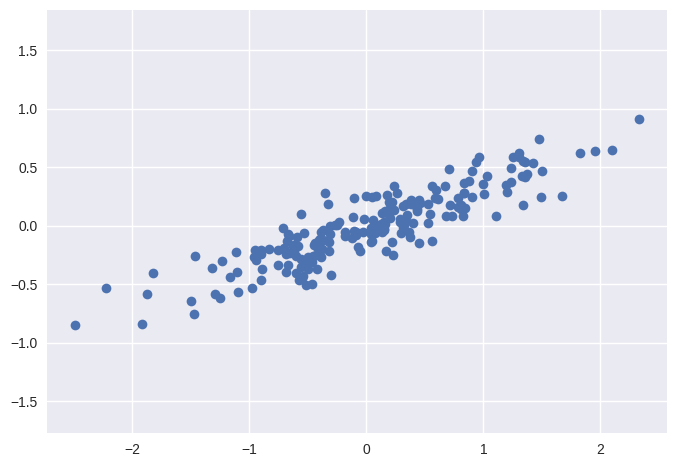

In [10]:
# Set a random seed for reproducibility
np.random.seed(1)

# Generate random data using a fixed-origin linear transformation
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T

# Plot the generated data
plt.plot(X[:, 0], X[:, 1], 'o')

# Ensure equal scaling of axes to avoid distortion
plt.axis('equal');

It's clear that the data exhibits a noticeable trend. PCA aims to identify the **Principal Axes** within the data and quantify the significance of each axis in describing the overall data distribution:

PCA components:
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


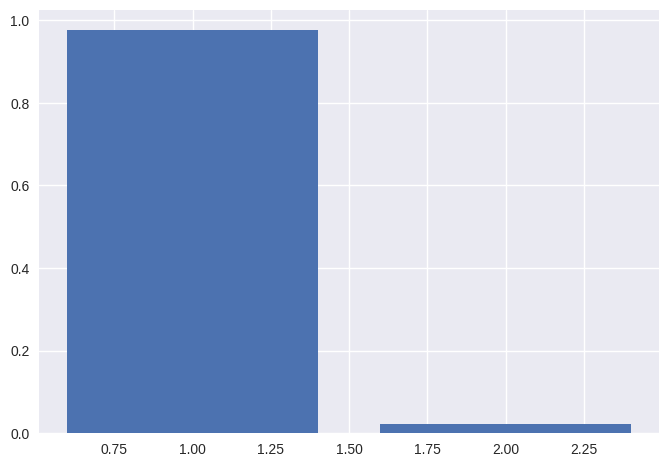

In [11]:
from sklearn.decomposition import PCA

# Initialize PCA for 2 components and fit the model to the data
pca = PCA(n_components=2)
pca.fit(X)

# Get the explained variance ratio for each principal component
variances = pca.explained_variance_ratio_

# Display the principal component directions (each row corresponds to one component)
print("PCA components:\n", pca.components_)

# Plot the explained variance of each component as a bar chart
plt.bar([1, 2], variances);

The `pca.components` rows represent the directions of the principal axes. The `pca.explained_variance_ratio` shows the proportion of the total variance that each principal component accounts for. As expected, the first principal component captures nearly all of the informative content.

To better understand these values, let's visualize them as vectors overlaid on the data:

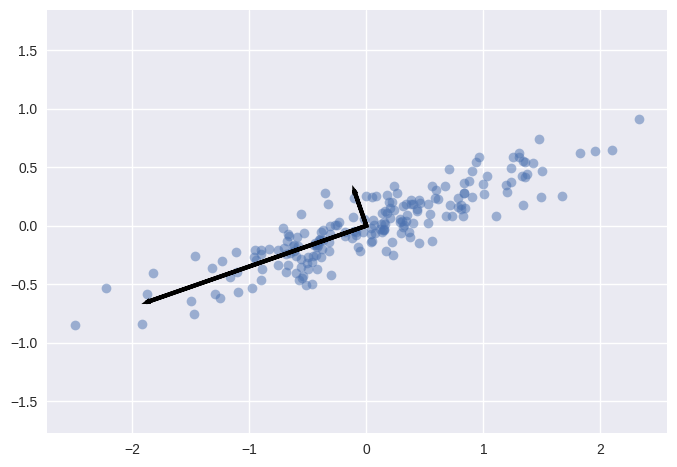

In [12]:
# Plot the data as a scatter plot with transparency for better visualization
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)  # 'o' creates the scatter plot; alpha adjusts color density based on point density

# Draw arrows representing the principal components
plt.arrow(0, 0, 2 * np.sqrt(variances[0]) * pca.components_[0, 0], 2 * np.sqrt(variances[0]) * pca.components_[0, 1], lw=3, zorder=2)
plt.arrow(0, 0, 2 * np.sqrt(variances[1]) * pca.components_[1, 0], 2 * np.sqrt(variances[1]) * pca.components_[1, 1], lw=3, zorder=2)

# Ensure equal scaling of the axes
plt.axis('equal');

Observe that one vector is longer than the other. This indicates that the corresponding direction in the data is more "significant" compared to the other. The explained variance quantifies this level of "importance" for each direction.

Alternatively, consider that the second principal component could be **entirely disregarded** with minimal loss of information. Let’s examine the data if we retain only 95% of the variance:

In [13]:
# Initialize PCA to retain 95% of the variance in the transformed data
compression = PCA(0.95)

# Fit the PCA model and transform the data
X_trans = compression.fit_transform(X)

# Print the shape of the original data
print("Shape of the original data: ", X.shape)

# Print the shape of the compressed data after PCA
print("\nShape of the compressed data: ", X_trans.shape)

Shape of the original data:  (200, 2)

Shape of the compressed data:  (200, 1)


By choosing to discard $5\%$ of the variance, we've achieved a $50\%$ reduction in the data size! Let’s take a look at the data following this compression:

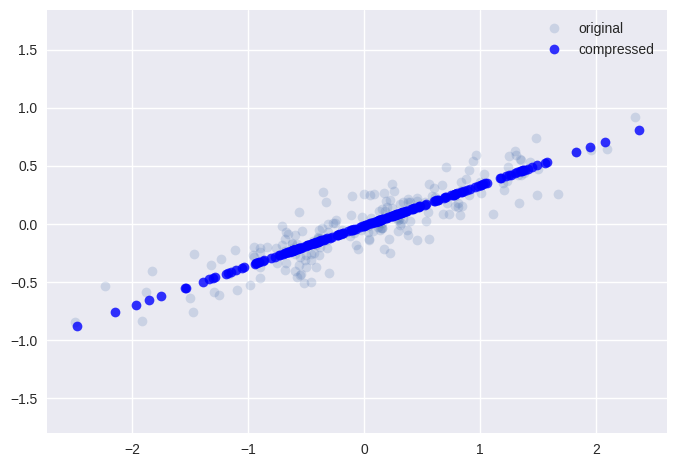

In [14]:
# Reconstruct the original data from the reduced components
X_new = compression.inverse_transform(X_trans)  # Transforms back to the original space using only the retained principal components

# Plot the original data with low transparency
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2, label="original")

# Plot the reconstructed data with higher transparency and in blue
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8, label="compressed")  # 'o' for scatter plot, 'b' for blue color
plt.legend()

# Ensure equal scaling of the axes
plt.axis('equal');

The light points represent the original data, while the dark points show the projected version. After removing $5\%$ of the variance from the dataset and then reprojecting it, we see that the "most important" features are preserved, and the data has been compressed by $50\%$!

This illustrates how "dimensionality reduction" functions: by approximating a dataset in a lower dimension, you can often simplify visualization and make it easier to fit complex models to the data.

### Applying PCA to Digits

Dimensionality reduction might seem somewhat abstract in *2 dimensions*, but it becomes incredibly valuable for visualizing high-dimensional data. Let’s explore how PCA is applied to the digits:

In [15]:
from sklearn.datasets import load_digits

# Load the digit dataset and extract features and target labels
digits = load_digits()
X = digits.data
y = digits.target

In [16]:
# Apply PCA to reduce the dimensionality from 64 to 2 dimensions
pca = PCA(2)
Xproj = pca.fit_transform(X)

# Print the shape of the original data
print("Shape of the original data: ", X.shape)

# Print the shape of the data after projection
print("\nShape of the projected data: ", Xproj.shape)

Shape of the original data:  (1797, 64)

Shape of the projected data:  (1797, 2)


<ipython-input-17-ad203f613822>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


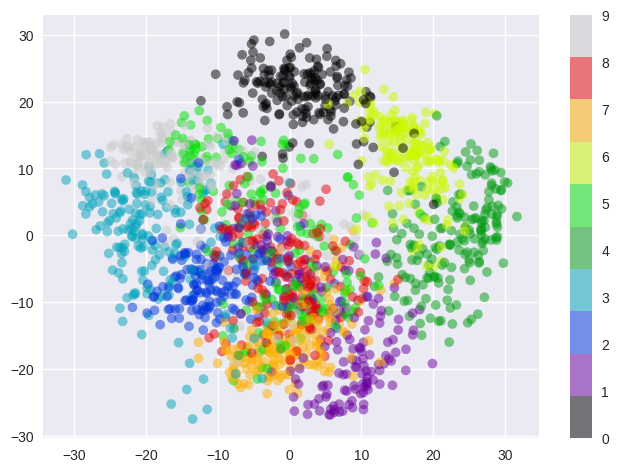

In [17]:
# Create a scatter plot of the projected data with color coding for different classes
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

# Add a color bar to indicate the class labels
plt.colorbar()

This approach helps us understand the relationship between the digits by finding the optimal stretch and rotation in a 64-dimensional space, allowing us to visualize their arrangement **without using labels**.

The dataset is known as the "digit dataset" because if we reshape the 64-dimensional datapoints into an 8x8 matrix and display them in shades of grey, we can clearly distinguish the numbers.

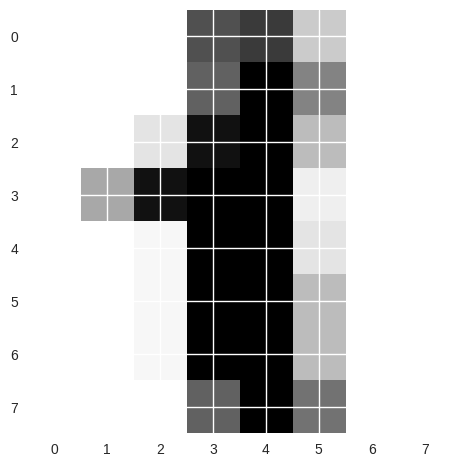

The label is:  1


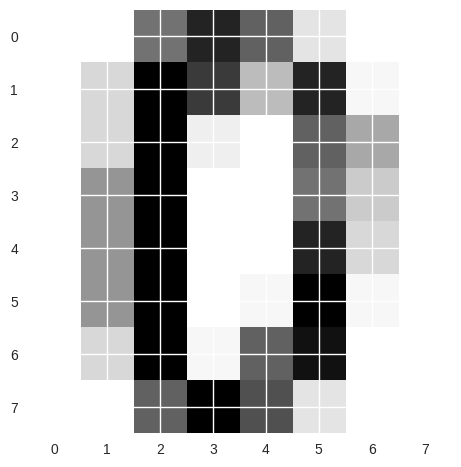

The label is:  0


In [18]:
# Display the image corresponding to the second sample in the dataset
plt.imshow(X[1, :].reshape((8, 8)))
plt.show()
print('The label is: ', y[1])

# Display the image corresponding to the thirty-first sample in the dataset
plt.imshow(X[30, :].reshape((8, 8)))
plt.show()
print('The label is: ', y[30])

### Understanding the Components

PCA is a powerful dimensionality reduction technique with an intuitive interpretation through *eigenvectors*. The input data is represented as a vector, for example, in the case of the digits:

$$
x = [x_1, x_2, x_3, \ldots]
$$

This can be understood as:

$$
\text{image}(x) = x_1 \cdot \textbf{(pixel 1)} + x_2 \cdot \textbf{(pixel 2)} + x_3 \cdot \textbf{(pixel 3)} + \ldots
$$

---

When we reduce the dimensionality in the pixel space to, say, $6$ dimensions, we end up with only a partial image:

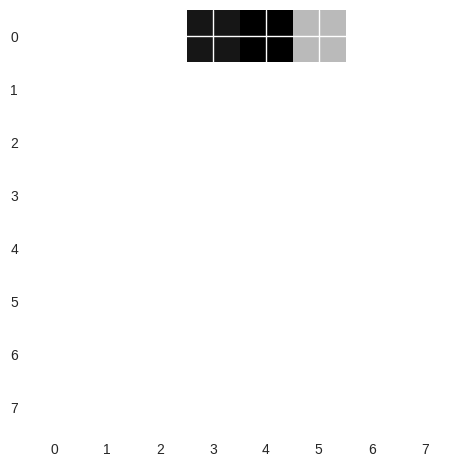

The label is:  1


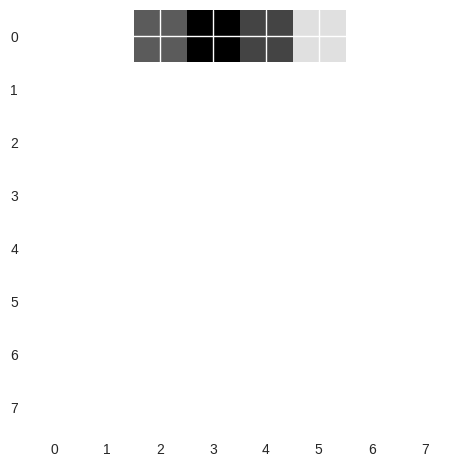

The label is:  0


In [19]:
# Create a filter to keep only the first 6 pixels, setting others to zero
filter = np.zeros(64)
for i in range(6):
    filter[i] = 1

# Apply the filter to retain only the first 6 pixels of each image
X_6_pixels = X * filter

# Display the image corresponding to the second sample with only 6 pixels
plt.imshow(X_6_pixels[1, :].reshape((8, 8)))
plt.show()
print('The label is: ', y[1])

# Display the image corresponding to the thirty-first sample with only 6 pixels
plt.imshow(X_6_pixels[30, :].reshape((8, 8)))
plt.show()
print('The label is: ', y[30])


This dimensionality reduction approach clearly fails to work well, as the numbers become unrecognizable!

However, pixel-wise representation isn’t the only option. Instead, we can use different *basis functions* and represent the image as:

$$
\text{image}(\tilde x) = \text{mean} + \tilde x_1 \cdot \textbf{(basis 1)} + \tilde x_2 \cdot \textbf{(basis 2)} + \tilde x_3 \cdot \textbf{(basis 3)} + \ldots
$$

PCA selects optimal **basis functions** such that only a few are needed to achieve a reasonable approximation. The low-dimensional representation of the data consists of the coefficients for these basis functions, and the approximate reconstruction is the result of summing these components.

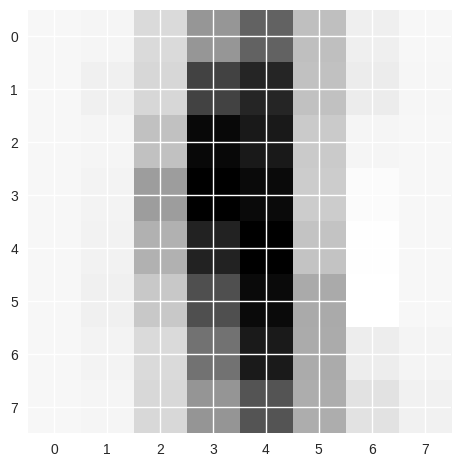

The label is:  1


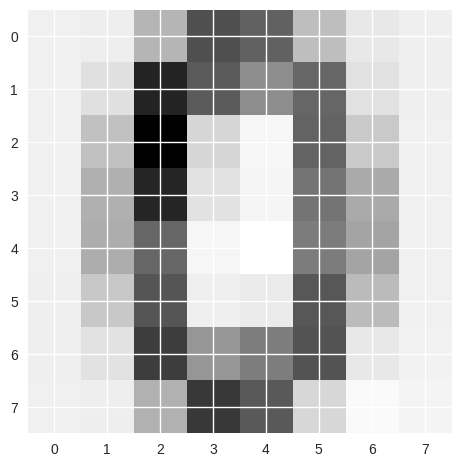

The label is:  0


In [34]:
# Initialize PCA to reduce the dimensionality from 64 to 6 components
pca = PCA(n_components=6)
Xproj = pca.fit_transform(X)

# Reconstruct the data from the 6 principal components
X_new = pca.inverse_transform(Xproj)

# Display the image corresponding to the second sample after dimensionality reduction and reconstruction
plt.imshow(X_new[1, :].reshape((8, 8)))
plt.show()
print('The label is: ', y[1])

# Display the image corresponding to the thirty-first sample after dimensionality reduction and reconstruction
plt.imshow(X_new[30, :].reshape((8, 8)))
plt.show()
print('The label is: ', y[30])

n = 100

With just six PCA components, we obtain a reasonably accurate approximation of the input!

This demonstrates that PCA can be understood from two perspectives: as **dimensionality reduction** or as a form of **lossy data compression** where the compression process emphasizes retaining meaningful information while discarding noise. In this sense, PCA also functions as a **filtering** technique.

---
### Exercise: What does a principal component represent?

Find a method to show what the first principal component represents.

### Choosing the Number of Components

But how much information have we discarded? We can determine this by examining the **explained variance** as a function of the number of components:

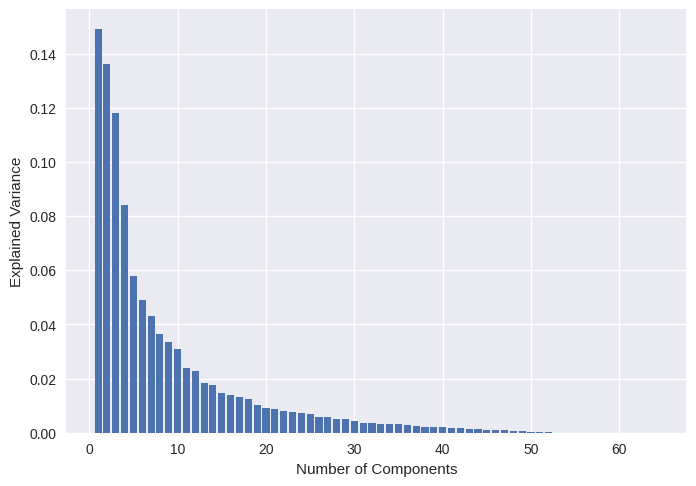

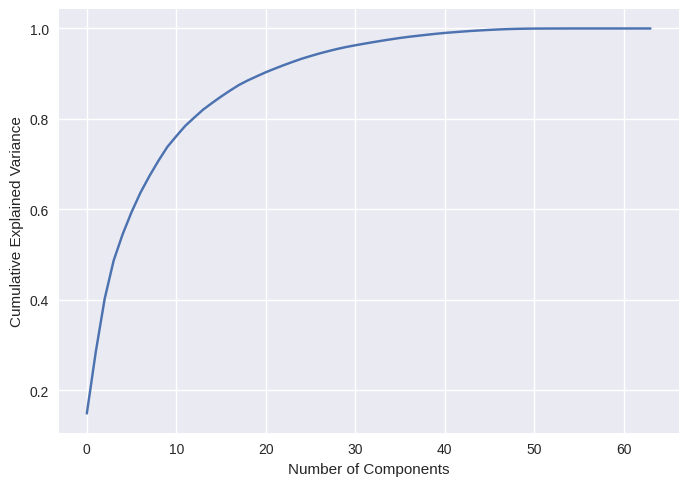

In [36]:
# Fit PCA without specifying the number of components to compute variance ratios for all components
pca = PCA().fit(X)

# Plot the explained variance ratio for each principal component
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

# Plot the cumulative explained variance as a function of the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))  # Cumulative sum of explained variance
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Here, we observe that a two-dimensional projection results in a significant loss of information, as indicated by the explained variance. To retain 90% of the variance, approximately 20 components are needed. With just 6 components, we preserved around 65% of the variance but were still able to recognize the numbers. Examining this plot for high-dimensional datasets can help you gauge the level of redundancy in the data and understand how much information is retained or lost with different numbers of components.

---
### Exercise: PCA Analysis on the Wine Dataset
(https://rowannicholls.github.io/python/data/sklearn_datasets/wine.html)

1. **Plot in Two-Dimensional Space**

   Project the data into two dimensions. Create a scatter plot to visualize the dataset.

2. **Plot the Information Lost as a Function of the Number of PCA Components**

   Use the cumulative explained variance to show how much information is lost as the number of components increases.

3. **Rescale the dataset and display the information lost as a function of the number of PCA components once more. Why is this improvement?**

    To rescale, use the following code:
```
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)
```


4. **Determine the Number of Components Needed to Retain 99% of the Information**

   Find out how many PCA components are required to retain 99% of the total variance in the dataset.



5. **Check if the Classes are Separated in the PCA Space**

   Plot the data in the PCA space and check whether the different classes are distinguishable or well-separated.

In [40]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler


# Load the wine dataset and extract features and target labels
wine = load_wine()
X = wine.data
y = wine.target

# Print the names of the features in the dataset
print("Names of the features: ", wine.feature_names)

# Print the names of the target classes
print("Names of the classes: ", wine.target_names)

Names of the features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Names of the classes:  ['class_0' 'class_1' 'class_2']


## Non-Linear Dimensionality Reduction: **T-SNE**

For a practical explanation of t-SNE, check out this resource: [Distill's Explanation of t-SNE](https://distill.pub/2016/misread-tsne/).

Let’s explore this data with t-SNE:

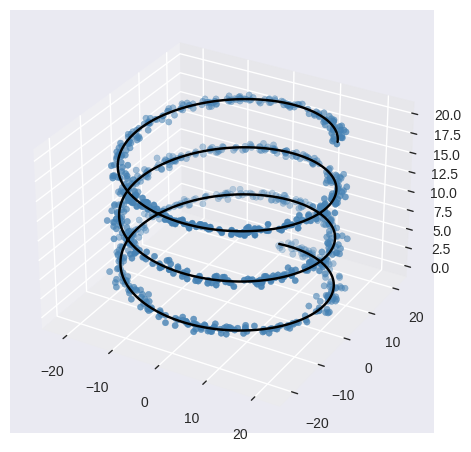

In [44]:
np.random.seed(1)

# Create a 3D plot
ax = plt.axes(projection='3d')

# Generate data for a 3D line
zline = np.linspace(0, 20, 1000)
xline = 20 * np.sin(zline)
yline = 20 * np.cos(zline)
ax.plot3D(xline, yline, zline, 'black')  # Plot the 3D line

# Generate data for 3D scattered points
zdata = 20 * np.random.random(1000)
xdata = 20 * np.sin(zdata) + 0.9 * np.random.randn(1000)
ydata = 20 * np.cos(zdata) + 0.9 * np.random.randn(1000)
ax.scatter3D(xdata, ydata, zdata, c='steelblue')  # Scatter plot the 3D points

In [45]:
# Create a data matrix by stacking the x, y, and z coordinate arrays
X_data = np.vstack((xdata, ydata))
X_data = np.vstack((X_data, zdata))
X_data = X_data.T  # Transpose to get the shape (n_samples, 3)

# Verify that the columns of X_data match the original coordinate arrays
if all(X_data[:, 0] == xdata) and all(X_data[:, 1] == ydata) and all(X_data[:, 2] == zdata):
    print('Check ok!')

Check ok!


Let’s examine what happens when we reduce dimensions from $3$ to $2$ using PCA:

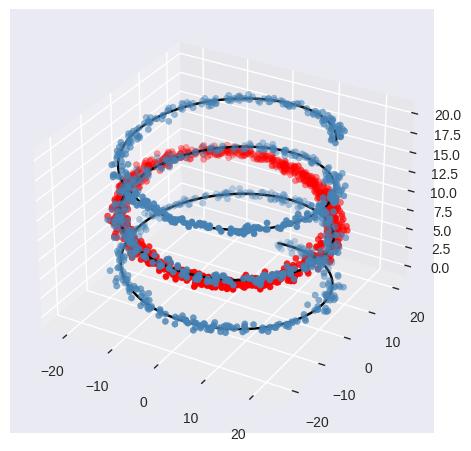

In [46]:
# Initialize PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
pca.fit(X_data)

# Project the data to the 2D principal components space
X_proj = pca.transform(X_data)

# Reconstruct the data from the 2D principal components space
X_new = pca.inverse_transform(X_proj)

# Create a 3D plot
ax = plt.axes(projection='3d')

# Plot the 3D line
ax.plot3D(xline, yline, zline, 'black')

# Scatter plot of the original 3D data points
ax.scatter3D(xdata, ydata, zdata, c='steelblue')

# Scatter plot of the reconstructed 3D data points (from PCA)
ax.scatter3D(X_new[:, 0], X_new[:, 1], X_new[:, 2], c='red')

We dislike this situation because points that are far apart end up being projected close together (e.g., points with the same x and y coordinates but on different spiral turns).

We can analyze the relationship between the distance in the projection and the distance in the original data.

Text(0, 0.5, 'Distance of Real Data')

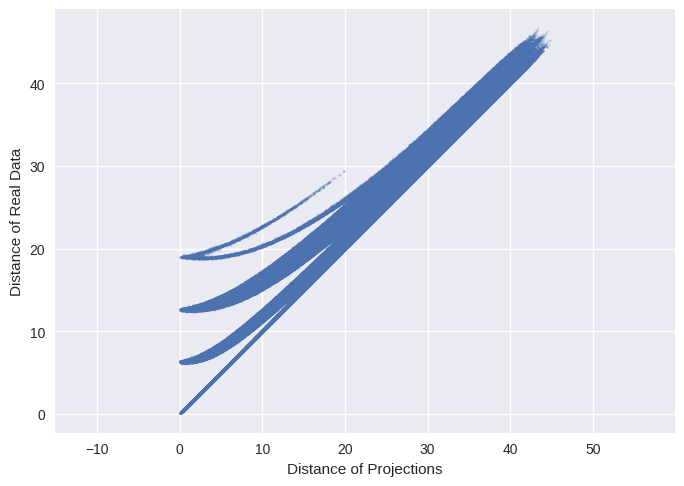

In [47]:
# Calculate the number of unique pairs in 1000 data points
num_pairs = int(1000 * 999 / 2)

# Initialize arrays to store pairwise distances for original and reconstructed data
distances_X_data = np.zeros(num_pairs)
distances_X_new = np.zeros(num_pairs)
counter = 0

# Compute pairwise distances for the original and reconstructed data
for i in range(len(X_data[:, 0])):
    for j in range(i + 1, len(X_data[:, 0])):
        distances_X_data[counter] = np.linalg.norm(X_data[i, :] - X_data[j, :])
        distances_X_new[counter] = np.linalg.norm(X_new[i, :] - X_new[j, :])
        counter += 1

# Plot the pairwise distances of the original data versus the reconstructed data
plt.scatter(distances_X_new, distances_X_data, alpha=0.2, s=1.5)
plt.axis('equal')
plt.xlabel('Distance of Projections')
plt.ylabel('Distance of Real Data')

A zero distance in the projection doesn’t necessarily mean the data points are close in the original space.

The issue is that PCA fails to capture the non-linear structure of the data. A circular representation is inadequate because it disregards the spiral structure and other details.

We can address this by using a non-linear dimensionality reduction method: **T-SNE**.

Shape of the t-SNE transformed data:  (1000, 2)


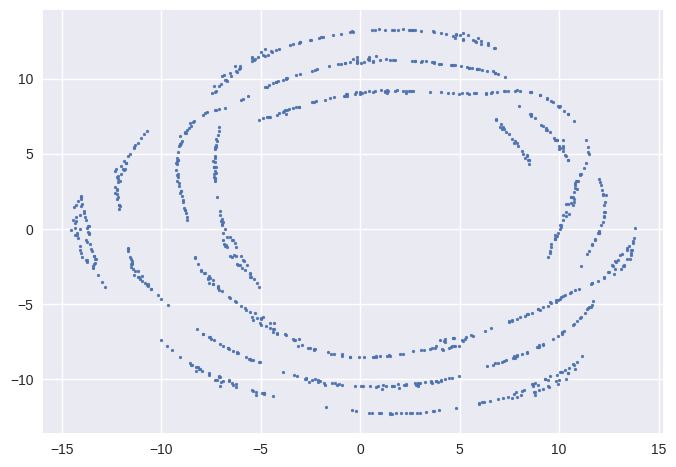

In [48]:
np.random.seed(4)

from sklearn.manifold import TSNE

# Initialize t-SNE to reduce the dimensionality to 2 components with a specified perplexity
tsne = TSNE(n_components=2, perplexity=90)

# Apply t-SNE to the data
X_embedded = tsne.fit_transform(X_data)

# Print the shape of the t-SNE transformed data
print("Shape of the t-SNE transformed data: ", X_embedded.shape)

# Create a scatter plot of the t-SNE transformed data
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=4)


We somewhat preserve the spiral structure with t-SNE! A human viewing this representation will have a clearer understanding of the real data compared to a circular plot.

However, we should also examine the distances. It’s important to note that non-linear methods often distort the space, which means that relative distances may lose their meaning.

In [49]:
# Initialize an array to store pairwise distances for the t-SNE transformed data
distances_X_embedded = np.zeros(int(1000 * 999 / 2))
counter = 0

# Compute pairwise distances for the t-SNE embedded data
for i in range(len(X_data[:, 0])):
    for j in range(i + 1, len(X_data[:, 0])):
        distances_X_embedded[counter] = np.linalg.norm(X_embedded[i, :] - X_embedded[j, :])
        counter += 1

Since we are comparing distances in two different spaces, we need to normalize the distance distribution to a common scale, with a mean of 0 and a variance of 1. This step is necessary for accurate comparison. This wasn’t required in the PCA case because it involved changing the _basis_ of the same _space_, not shifting to a different _space_.

Text(0, 0.5, 'Distance of Real Data')

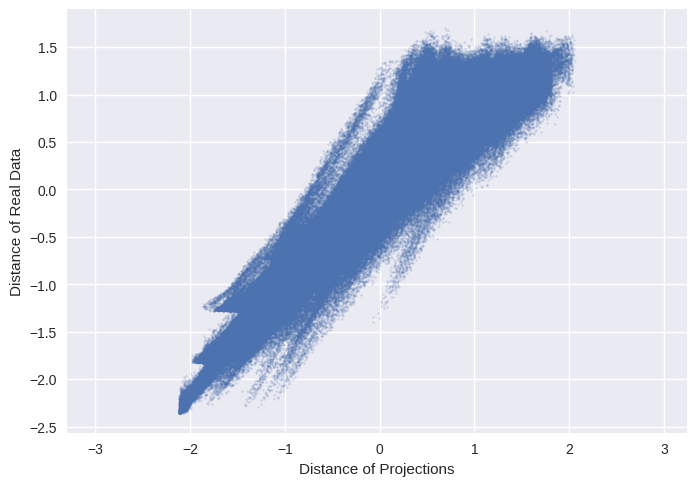

In [50]:
# Normalize the pairwise distances for the original and t-SNE embedded data
normed_dist = (distances_X_data - distances_X_data.mean()) / distances_X_data.std()
normed_emb_dist = (distances_X_embedded - distances_X_embedded.mean()) / distances_X_embedded.std()

# Plot the normalized distances of the t-SNE embeddings versus the original data
plt.scatter(normed_emb_dist, normed_dist, alpha=0.2, s=1.5)
plt.axis('equal')
plt.xlabel('Distance of Projections')
plt.ylabel('Distance of Real Data')

As expected, non-linear methods struggle more with distances, but t-SNE helps address the crowding problem seen with PCA.

To summarize:
- T-SNE is primarily a tool for data visualization. It doesn’t provide a straightforward way to interpret the reduced space or project back to the original space, making it challenging to use the reduced data as a compression of the original since we can’t recover the original information.
- Additionally, we can’t project different datasets into the same embedded space using t-SNE, so comparing projections of different datasets to assess their similarity is difficult. In contrast, PCA allows for this comparison because we can apply a linear transformation to each dataset.

These are key differences between t-SNE and PCA.

# UMAP

https://pair-code.github.io/understanding-umap/
